In [3]:
import re
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from collections import defaultdict

# finished

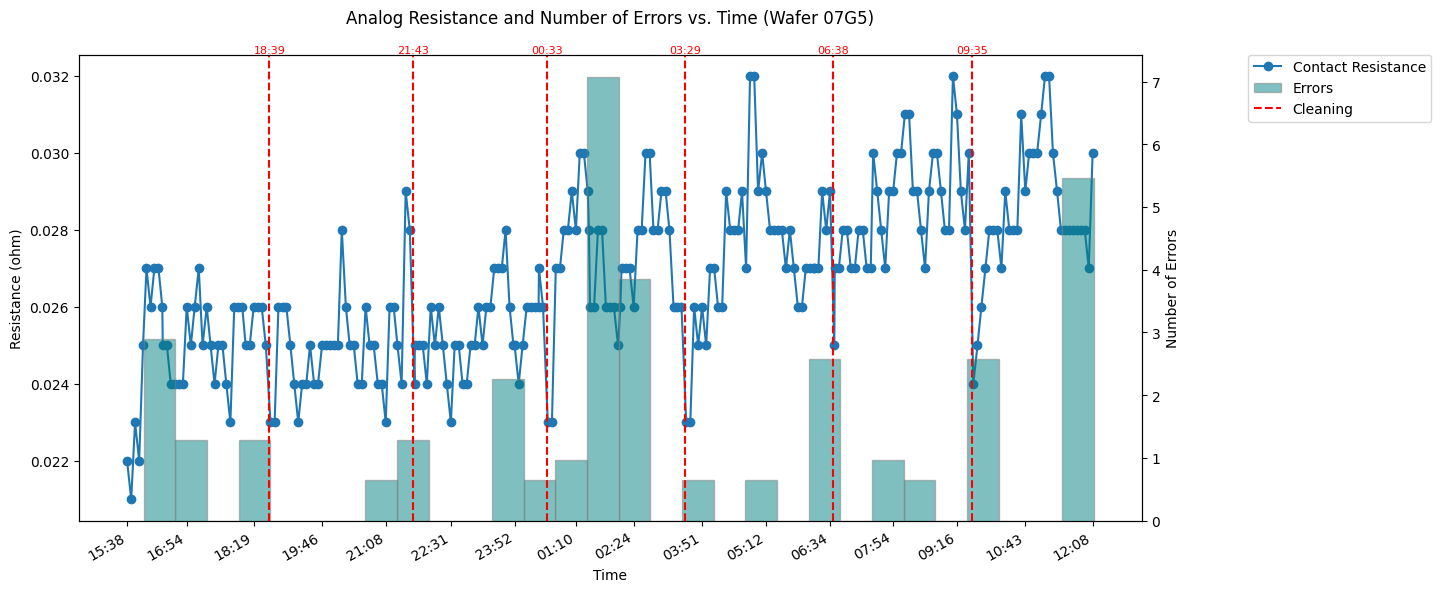

In [10]:
#ANALOG contact resistance, over TIME
#open file
with open(os.path.expanduser('~/WLT/WLT_v1.4.1/croc_wlt/data/wafer_NC0W14-07G5/20240606_153809/wafer_NC0W14-07G5_20240606_153809.log'), 'r') as file:
    log_content = file.readlines()

#search for contact resistance values and times
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*Contact resistance \(analog\): (\d+\.\d+) ohm'
time_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*Performing periodic cleaning of the needles'
timestamps = []
resistances = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        timestamp = match.group(1)
        resistance = float(match.group(2))  # Convert resistance to float
        timestamps.append(timestamp)
        resistances.append(resistance)

#search for cleaning times        
times = []
for i in log_content:
    good = re.search(time_pattern, i)
    if good:
        time = good.group(1)
        times.append(time)

#Set up patterns
waferpattern = r'Wafer: (\w\w\w\w)'
waferid = ""
testabortpattern = r'Testing has been aborted for chip (.*)'
failedtestchips = []
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| ChipTester \(\S\S\S\S\-(\w\w\)) \| ERROR    \| (.*)'
nochippattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| .* \((\S\S\S\S).*\| ERROR    \| (.*)'
errtimestamps = []

#Find errors, names of aborted chips, and wafer ID
chip = ()
errors1 = ()
errors = []
nochiperror = ()
nochiperrors = []
for line in log_content:
    match = re.search(pattern, line)
    nochipmatch = re.search(nochippattern, line)
    if match:
        chip = str(match.group(2)) 
        chip = chip.replace(")","")
        errors1 = match.group(3) 
        errors.append(chip+errors1)
        testabortmatch = re.search(testabortpattern, line)
        errtimestamps.append(match.group(1))
        if testabortmatch:
            failedtestchips.append(testabortmatch.group(1))
    elif nochipmatch:
        if nochipmatch.group(3) != "Waferprobing has been aborted!":
            errors.append("AA" + nochipmatch.group(3))
            errtimestamps.append(match.group(1))
    wafermatch = re.search(waferpattern, line)
    if wafermatch:
        waferid = str(wafermatch.group(1))

#Set dates
dates = [datetime.strptime(f'{ts}', '%Y-%m-%d %H:%M:%S,%f') for ts in timestamps]
errdates = [datetime.strptime(f'{ts}', '%Y-%m-%d %H:%M:%S,%f') for ts in errtimestamps]

# Plot line plot and histogram
fig, ax_line = plt.subplots(figsize=(12,6))  # Axes for line plot
ax_hist = ax_line.twinx()
ax_line.plot(dates, resistances, marker='o', linestyle='-', label = 'Contact Resistance')
plt.hist(errdates, bins=30, edgecolor="grey", color="teal", density=True, alpha=0.5, label='Errors')
  
# Add vertical lines for cleaning times.
for time in times:
    time_dt = datetime.strptime(f'{time}', '%Y-%m-%d %H:%M:%S,%f')
    hour_minute = time_dt.strftime('%H:%M')
    plt.axvline(x=time_dt, color='r', linestyle='--')
    plt.text(time_dt, plt.gca().get_ylim()[1], hour_minute, ha='center', va='bottom', color='r', fontsize=8)

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()

# Set labels and title
ax_line.set_xlabel('Time')
ax_line.set_ylabel('Resistance (ohm)')
ax_line.set_title(f'Analog Resistance and Number of Errors vs. Time (Wafer {waferid})', y=1.05)
ax_hist.set_ylabel('Number of Errors')

# Get 16 evenly spaced indices from the dates list
indices = np.linspace(0, len(dates) - 1, num=16, dtype=int)

# Use the indices to get the corresponding dates and set them as tick locations and labels
plt.xticks([dates[i] for i in indices], [dates[i].strftime('%H:%M') for i in indices])

#Tight layout
fig.tight_layout()

#Display legend
plt.plot([], linestyle='--', color='r', label='Cleaning')
handles, labels = [], []
for ax in [ax_line, ax_hist]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
ax_line.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1), borderaxespad=0.)

# Show plot
plt.savefig(f'Analog Resistance and Number of Errors vs. Time (Wafer {waferid}).png')

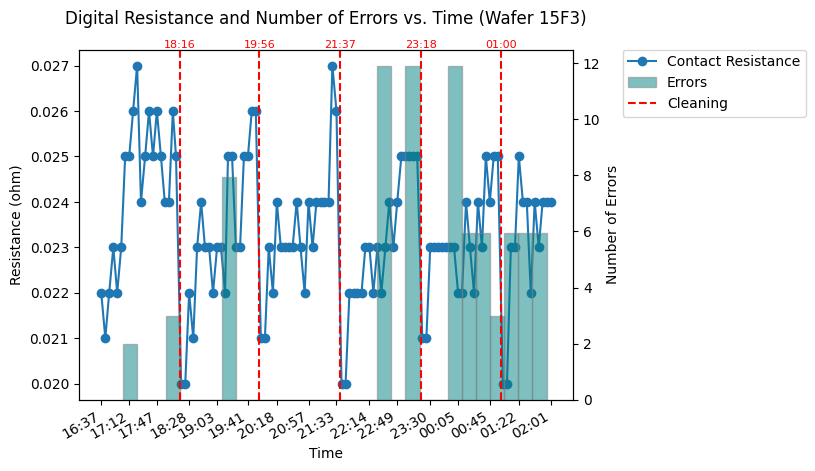

In [12]:
#DIGITAL Contact Resistance, over TIME
#open file
with open(os.path.expanduser('~/Desktop/CROCv2-iter2/wafer_N61F26-15F3_20240412_163717.log'), 'r') as file:
    log_content = file.readlines()

#search for contact resistance values and times
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*Contact resistance \(digital\): (\d+\.\d+) ohm'
time_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*Performing periodic cleaning of the needles'
timestamps = []
resistances = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        timestamp = match.group(1)
        resistance = float(match.group(2))  # Convert resistance to float
        timestamps.append(timestamp)
        resistances.append(resistance)

#search for cleaning times        
times = []
for i in log_content:
    good = re.search(time_pattern, i)
    if good:
        time = good.group(1)
        times.append(time)

#Set up patterns
waferpattern = r'Wafer: (\w\w\w\w)'
waferid = ""
testabortpattern = r'Testing has been aborted for chip (.*)'
failedtestchips = []
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| ChipTester \(\S\S\S\S\-(\w\w\)) \| ERROR    \| (.*)'
nochippattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| .* \((\S\S\S\S).*\| ERROR    \| (.*)'
errtimestamps = []

#Find errors, names of aborted chips, and wafer ID
chip = ()
errors1 = ()
errors = []
nochiperror = ()
nochiperrors = []
for line in log_content:
    match = re.search(pattern, line)
    nochipmatch = re.search(nochippattern, line)
    if match:
        chip = str(match.group(2)) 
        chip = chip.replace(")","")
        errors1 = match.group(3) 
        errors.append(chip+errors1)
        testabortmatch = re.search(testabortpattern, line)
        errtimestamps.append(match.group(1))
        if testabortmatch:
            failedtestchips.append(testabortmatch.group(1))
    elif nochipmatch:
        if nochipmatch.group(3) != "Waferprobing has been aborted!":
            errors.append("AA" + nochipmatch.group(3))
            errtimestamps.append(match.group(1))
    wafermatch = re.search(waferpattern, line)
    if wafermatch:
        waferid = str(wafermatch.group(1))

#Set dates
dates = [datetime.strptime(f'{ts}', '%Y-%m-%d %H:%M:%S,%f') for ts in timestamps]
errdates = [datetime.strptime(f'{ts}', '%Y-%m-%d %H:%M:%S,%f') for ts in errtimestamps]

# Plot line plot and histogram
fig, ax_line = plt.subplots()  # Axes for line plot
ax_hist = ax_line.twinx()
ax_line.plot(dates, resistances, marker='o', linestyle='-', label = 'Contact Resistance')
plt.hist(errdates, bins=30, edgecolor="grey", color="teal", density=True, alpha=0.5, label='Errors')
  
# Add vertical lines for cleaning times
for time in times:
    time_dt = datetime.strptime(f'{time}', '%Y-%m-%d %H:%M:%S,%f')
    hour_minute = time_dt.strftime('%H:%M')
    plt.axvline(x=time_dt, color='r', linestyle='--')
    plt.text(time_dt, plt.gca().get_ylim()[1], hour_minute, ha='center', va='bottom', color='r', fontsize=8)

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()

# Set labels and title
ax_line.set_xlabel('Time')
ax_line.set_ylabel('Resistance (ohm)')
ax_line.set_title(f'Digital Resistance and Number of Errors vs. Time (Wafer {waferid})', y=1.05)
ax_hist.set_ylabel('Number of Errors')

# Get 16 evenly spaced indices from the dates list
indices = np.linspace(0, len(dates) - 1, num=16, dtype=int)

# Use the indices to get the corresponding dates and set them as tick locations and labels
plt.xticks([dates[i] for i in indices], [dates[i].strftime('%H:%M') for i in indices])

#Tight layout
fig.tight_layout()

#Display legend
plt.plot([], linestyle='--', color='r', label='Cleaning')
handles, labels = [], []
for ax in [ax_line, ax_hist]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
ax_line.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1), borderaxespad=0.)

# Show plot
plt.show()

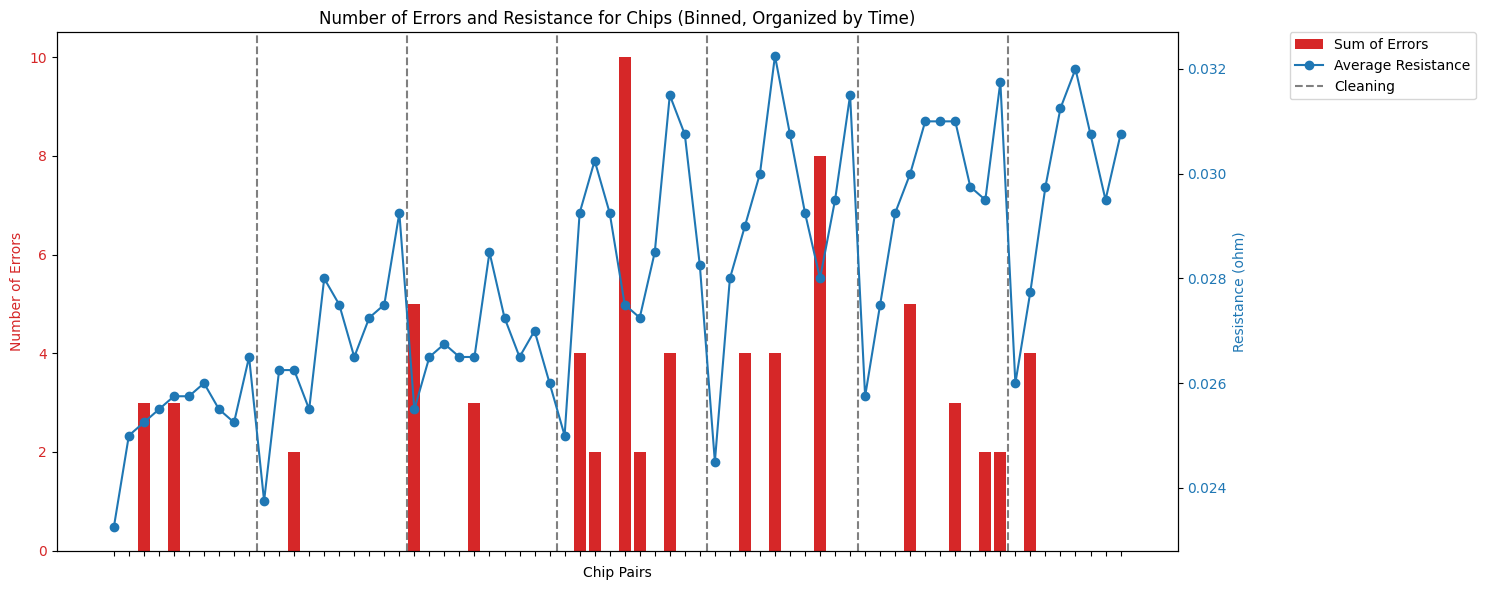

In [82]:
#ANALOG contact resistance, by CHIP

#Edit this to include the cleaning interval as stated in main_config.py
CLEANING = 20

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/wafer_NC0W14-05A4_20240607_150356.log'), 'r') as file:
    log_content = file.readlines()

#search for contact resistance values and times
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*\(\S\S\S\S\-(\w\w\)).*Contact resistance \(analog\): (\d+\.\d+) ohm'
timestamps = []
resistances = []
chips = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        timestamp = match.group(1)
        resistance = float(match.group(3))  # Convert resistance to float
        timestamps.append(timestamp)
        resistances.append(resistance)
        chips.append(match.group(2)[:2])

#Find average contact resistance for each chip
unique_chips = []
averaged_resistances = [] 
visited = set()  # To track which elements of a have been visited
for i, item in enumerate(chips):
    if item not in visited:
        # Add unique item to new chips 
        unique_chips.append(item)
        visited.add(item)
        # Calculate average of corresponding elements in b
        indices = [j for j in range(len(chips)) if chips[j] == item]
        avg = sum(resistances[j] for j in indices) / len(indices)
        avg_formatted = f"{avg:.5}"  # Using f-string with 5 decimal places
        averaged_resistances.append(avg_formatted)

#Set up patterns
waferpattern = r'Wafer: (\w\w\w\w)'
waferid = ""
testabortpattern = r'Testing has been aborted for chip (.*)'
failedtestchips = []
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| ChipTester \(\S\S\S\S\-(\w\w\)) \| ERROR    \| (.*)'
errtimestamps = []

#Count number of errors each chip has, collect names of aborted chips and wafer ID
chip = ()
errperchip = []
errors = []
for line in log_content:
    match = re.search(pattern, line)
    #nochipmatch = re.search(nochippattern, line)
    if match:
        chip = str(match.group(2)) 
        chip = chip.replace(")","")  
        errors.append(match.group(3))
        errperchip.append(chip)
        testabortmatch = re.search(testabortpattern, line)
        errtimestamps.append(match.group(1))
        if testabortmatch:
            failedtestchips.append(testabortmatch.group(1))
    wafermatch = re.search(waferpattern, line)
    if wafermatch:
        waferid = str(wafermatch.group(1))


#Make a dictionary with chip id:number of errors
#Initialize error_counter as a defaultdict with int type
error_counter = defaultdict(int)

#Initialize error_counter with zero counts for each item in unique_chips
for chip in unique_chips:
    error_counter[chip] = 0

#Count occurrences of each item in unique_chips in errperchip
for chip in errperchip:
    if chip in error_counter:
        error_counter[chip] += 1

#Initialize lists to store binned data
binned_chips = []
binned_avg_resistances = []
binned_sum_errors = []

#Bin chips into pairs and compute average resistance and sum of errors
for i in range(0, len(unique_chips), 2):
    chip1 = unique_chips[i]
    chip2 = unique_chips[i + 1] if i + 1 < len(unique_chips) else None
    
    # Calculate average resistance
    if chip2:
        avg_resistance = (float(averaged_resistances[i]) + float(averaged_resistances[i + 1])) / 2
        binned_chips.append(f"{chip1} - {chip2}")  # Combine chip labels for grouping
        binned_avg_resistances.append(avg_resistance)
        
        # Calculate sum of errors
        sum_errors = error_counter[chip1] + error_counter[chip2]
        binned_sum_errors.append(sum_errors)

#Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))  # Adjust size as needed

#Plot average resistance
ax1.bar(binned_chips, binned_sum_errors, color='tab:red', label='Sum of Errors')
ax1.set_xlabel('Chip Pairs')
ax1.set_ylabel('Number of Errors', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

#Create a secondary y-axis for average resistance
ax2 = ax1.twinx()
ax2.plot(binned_chips, binned_avg_resistances, color='tab:blue', marker='o', linestyle='-', label='Average Resistance')
ax2.set_ylabel('Resistance (ohm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels([])

#Add cleaning lines
for i in range(int(CLEANING / 2), len(binned_chips), int(CLEANING / 2)):
    ax1.axvline(x=i-0.5, color='grey', linestyle='--')  # Adjust position for centering

#Add legend
plt.plot([], linestyle='--', color='grey', label='Cleaning')
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1), borderaxespad=0.)

#Show plot
plt.title('Number of Errors and Resistance for Chips (Binned, Organized by Time)')
plt.tight_layout()
plt.show()

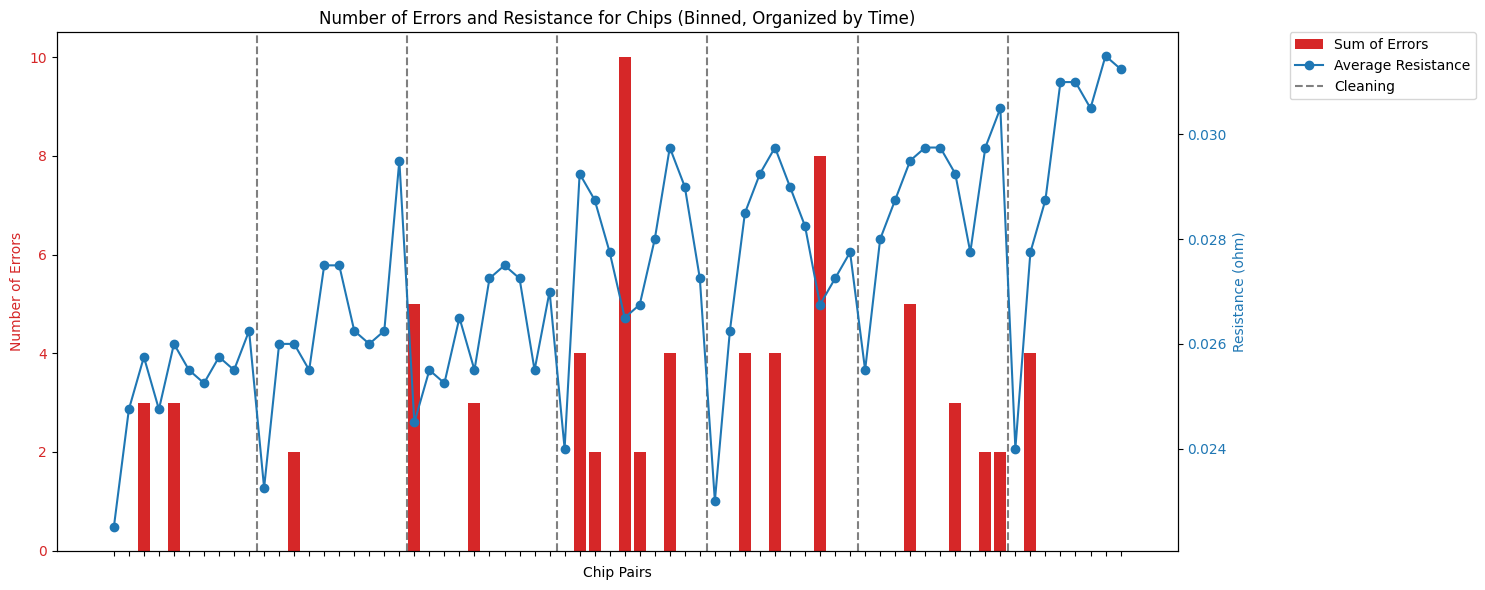

In [84]:
#DIGITAL contact resistance, by CHIP

#Edit this to include the cleaning interval as stated in main_config.py
CLEANING = 20

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/wafer_NC0W14-05A4_20240607_150356.log'), 'r') as file:
    log_content = file.readlines()

#search for contact resistance values and times
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*\(\S\S\S\S\-(\w\w\)).*Contact resistance \(digital\): (\d+\.\d+) ohm'
time_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*Performing periodic cleaning of the needles'
timestamps = []
resistances = []
chips = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        timestamp = match.group(1)
        resistance = float(match.group(3))  # Convert resistance to float
        timestamps.append(timestamp)
        resistances.append(resistance)
        chips.append(match.group(2)[:2])

#Find average contact resistance for each chip
unique_chips = []
averaged_resistances = [] 
visited = set()  # To track which elements of a have been visited
for i, item in enumerate(chips):
    if item not in visited:
        # Add unique item to new chips 
        unique_chips.append(item)
        visited.add(item)
        # Calculate average of corresponding elements in b
        indices = [j for j in range(len(chips)) if chips[j] == item]
        avg = sum(resistances[j] for j in indices) / len(indices)
        avg_formatted = f"{avg:.5}"  # Using f-string with 5 decimal places
        averaged_resistances.append(avg_formatted)

#Set up patterns
waferpattern = r'Wafer: (\w\w\w\w)'
waferid = ""
testabortpattern = r'Testing has been aborted for chip (.*)'
failedtestchips = []
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| ChipTester \(\S\S\S\S\-(\w\w\)) \| ERROR    \| (.*)'
#nochippattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| .* \((\S\S\S\S).*\| ERROR    \| (.*)'
errtimestamps = []

#Count number of errors each chip has, collect names of aborted chips and wafer ID
chip = ()
errperchip = []
errors = []
for line in log_content:
    match = re.search(pattern, line)
    #nochipmatch = re.search(nochippattern, line)
    if match:
        chip = str(match.group(2)) 
        chip = chip.replace(")","")  
        errors.append(match.group(3))
        errperchip.append(chip)
        testabortmatch = re.search(testabortpattern, line)
        errtimestamps.append(match.group(1))
        if testabortmatch:
            failedtestchips.append(testabortmatch.group(1))
    wafermatch = re.search(waferpattern, line)
    if wafermatch:
        waferid = str(wafermatch.group(1))

#Make a dictionary with chip id:number of errors
#Initialize error_counter as a defaultdict with int type
error_counter = defaultdict(int)

#Initialize error_counter with zero counts for each item in unique_chips
for chip in unique_chips:
    error_counter[chip] = 0

#Count occurrences of each item in unique_chips in errperchip
for chip in errperchip:
    if chip in error_counter:
        error_counter[chip] += 1

#Initialize lists to store binned data
binned_chips = []
binned_avg_resistances = []
binned_sum_errors = []

#Bin chips into pairs and compute average resistance and sum of errors
for i in range(0, len(unique_chips), 2):
    chip1 = unique_chips[i]
    chip2 = unique_chips[i + 1] if i + 1 < len(unique_chips) else None
    
    # Calculate average resistance
    if chip2:
        avg_resistance = (float(averaged_resistances[i]) + float(averaged_resistances[i + 1])) / 2
        binned_chips.append(f"{chip1} - {chip2}")  # Combine chip labels for grouping
        binned_avg_resistances.append(avg_resistance)
        
        # Calculate sum of errors
        sum_errors = error_counter[chip1] + error_counter[chip2]
        binned_sum_errors.append(sum_errors)

#Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))  # Adjust size as needed

#Plot average resistance
ax1.bar(binned_chips, binned_sum_errors, color='tab:red', label='Sum of Errors')
ax1.set_xlabel('Chip Pairs')
ax1.set_ylabel('Number of Errors', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

#Create a secondary y-axis for average resistance
ax2 = ax1.twinx()
ax2.plot(binned_chips, binned_avg_resistances, color='tab:blue', marker='o', linestyle='-', label='Average Resistance')
ax2.set_ylabel('Resistance (ohm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels([])

#Add cleaning lines
for i in range(int(CLEANING / 2), len(binned_chips), int(CLEANING / 2)):
    ax1.axvline(x=i-0.5, color='grey', linestyle='--')  # Adjust position for centering

#Add legend
plt.plot([], linestyle='--', color='grey', label='Cleaning')
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1), borderaxespad=0.)

#Show plot
plt.title('Number of Errors and Resistance for Chips (Binned, Organized by Time)')
plt.tight_layout()
plt.show()

# working

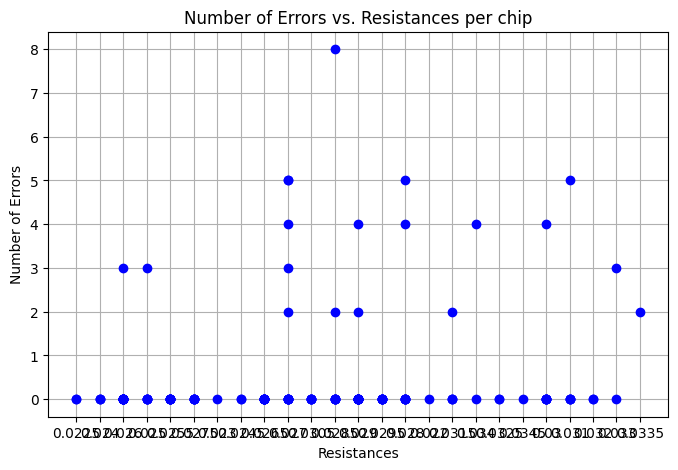

In [96]:
#ANALOG contact resistance vs errors

#Edit this to include the cleaning interval as stated in main_config.py
CLEANING = 20

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/wafer_NC0W14-05A4_20240607_150356.log'), 'r') as file:
    log_content = file.readlines()

#search for contact resistance values and times
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*\(\S\S\S\S\-(\w\w\)).*Contact resistance \(analog\): (\d+\.\d+) ohm'
timestamps = []
resistances = []
chips = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        timestamp = match.group(1)
        resistance = float(match.group(3))  # Convert resistance to float
        timestamps.append(timestamp)
        resistances.append(resistance)
        chips.append(match.group(2)[:2])

#Find average contact resistance for each chip
unique_chips = []
averaged_resistances = [] 
visited = set()  # To track which elements of a have been visited
for i, item in enumerate(chips):
    if item not in visited:
        # Add unique item to new chips 
        unique_chips.append(item)
        visited.add(item)
        # Calculate average of corresponding elements in b
        indices = [j for j in range(len(chips)) if chips[j] == item]
        avg = sum(resistances[j] for j in indices) / len(indices)
        avg_formatted = f"{avg:.5}"  # Using f-string with 5 decimal places
        averaged_resistances.append(avg_formatted)

#Set up patterns
waferpattern = r'Wafer: (\w\w\w\w)'
waferid = ""
testabortpattern = r'Testing has been aborted for chip (.*)'
failedtestchips = []
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| ChipTester \(\S\S\S\S\-(\w\w\)) \| ERROR    \| (.*)'
errtimestamps = []

#Count number of errors each chip has, collect names of aborted chips and wafer ID
chip = ()
errperchip = []
errors = []
for line in log_content:
    match = re.search(pattern, line)
    #nochipmatch = re.search(nochippattern, line)
    if match:
        chip = str(match.group(2)) 
        chip = chip.replace(")","")  
        errors.append(match.group(3))
        errperchip.append(chip)
        testabortmatch = re.search(testabortpattern, line)
        errtimestamps.append(match.group(1))
        if testabortmatch:
            failedtestchips.append(testabortmatch.group(1))
    wafermatch = re.search(waferpattern, line)
    if wafermatch:
        waferid = str(wafermatch.group(1))


#Make a dictionary with chip id:number of errors
#Initialize error_counter as a defaultdict with int type
error_counter = defaultdict(int)

#Initialize error_counter with zero counts for each item in unique_chips
for chip in unique_chips:
    error_counter[chip] = 0

#Count occurrences of each item in unique_chips in errperchip
for chip in errperchip:
    if chip in error_counter:
        error_counter[chip] += 1


#Plotting

# Extract x (list items) and y (dictionary values) from the data
x = averaged_resistances
y_values = error_counter.values()

# Plotting
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.plot(x, y_values, marker='o', linestyle='None', color='b')
plt.xlabel('Resistances')
plt.ylabel('Number of Errors')
plt.title('Number of Errors vs. Analog Resistances per chip')
plt.grid(True)
plt.show()

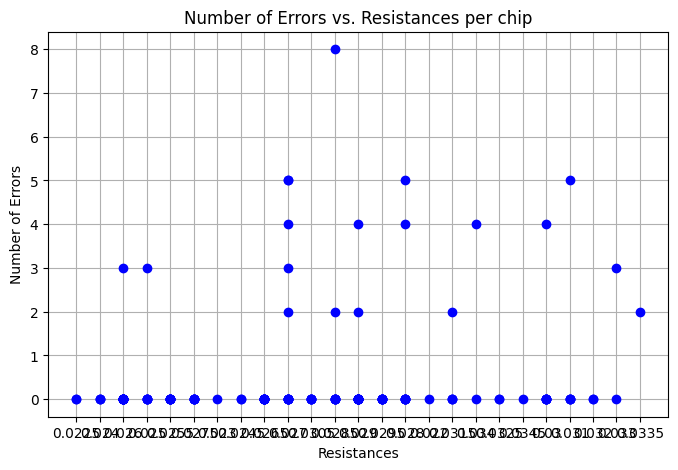

In [96]:
#DIGITAL contact resistance vs errors

#Edit this to include the cleaning interval as stated in main_config.py
CLEANING = 20

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/wafer_NC0W14-05A4_20240607_150356.log'), 'r') as file:
    log_content = file.readlines()

#search for contact resistance values and times
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*\(\S\S\S\S\-(\w\w\)).*Contact resistance \(digital\): (\d+\.\d+) ohm'
timestamps = []
resistances = []
chips = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        timestamp = match.group(1)
        resistance = float(match.group(3))  # Convert resistance to float
        timestamps.append(timestamp)
        resistances.append(resistance)
        chips.append(match.group(2)[:2])

#Find average contact resistance for each chip
unique_chips = []
averaged_resistances = [] 
visited = set()  # To track which elements of a have been visited
for i, item in enumerate(chips):
    if item not in visited:
        # Add unique item to new chips 
        unique_chips.append(item)
        visited.add(item)
        # Calculate average of corresponding elements in b
        indices = [j for j in range(len(chips)) if chips[j] == item]
        avg = sum(resistances[j] for j in indices) / len(indices)
        avg_formatted = f"{avg:.5}"  # Using f-string with 5 decimal places
        averaged_resistances.append(avg_formatted)

#Set up patterns
waferpattern = r'Wafer: (\w\w\w\w)'
waferid = ""
testabortpattern = r'Testing has been aborted for chip (.*)'
failedtestchips = []
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| ChipTester \(\S\S\S\S\-(\w\w\)) \| ERROR    \| (.*)'
errtimestamps = []

#Count number of errors each chip has, collect names of aborted chips and wafer ID
chip = ()
errperchip = []
errors = []
for line in log_content:
    match = re.search(pattern, line)
    #nochipmatch = re.search(nochippattern, line)
    if match:
        chip = str(match.group(2)) 
        chip = chip.replace(")","")  
        errors.append(match.group(3))
        errperchip.append(chip)
        testabortmatch = re.search(testabortpattern, line)
        errtimestamps.append(match.group(1))
        if testabortmatch:
            failedtestchips.append(testabortmatch.group(1))
    wafermatch = re.search(waferpattern, line)
    if wafermatch:
        waferid = str(wafermatch.group(1))


#Make a dictionary with chip id:number of errors
#Initialize error_counter as a defaultdict with int type
error_counter = defaultdict(int)

#Initialize error_counter with zero counts for each item in unique_chips
for chip in unique_chips:
    error_counter[chip] = 0

#Count occurrences of each item in unique_chips in errperchip
for chip in errperchip:
    if chip in error_counter:
        error_counter[chip] += 1


#Plotting

# Extract x (list items) and y (dictionary values) from the data
x = averaged_resistances
y_values = error_counter.values()

# Plotting
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.plot(x, y_values, marker='o', linestyle='None', color='b')
plt.xlabel('Resistances')
plt.ylabel('Number of Errors')
plt.title('Number of Errors vs. Digital Resistances per chip')
plt.grid(True)
plt.show()